# Titanic
### En este notebook realizaremos un analisis de la variables dentro del dataset y aplicaremos una regresión lineal para poder crear un algoritomo capaz de predecir si un individuo sobrevive al accidente.

In [319]:
#Importamos nuestras librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [320]:
titanic = pd.read_csv("/Users/joseignaciozamora/Desktop/Magister/Analisis de Datos/titanic/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [321]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Cantidad de sobrevivientes
#### Hacemos un analisis de las variables que nos encontramos dentro del dataset

In [322]:
#Por ejemplo, la cantidad de sobrevivientes y su proporción del total de personas a bordo durante el accidente.
titanic_0 =titanic[(titanic['Survived']==0)]
titanic_0["Survived"].count()

print(f'La cantidad de sobrevivientes es de {titanic_0["Survived"].count()}, equivalente a un {round(titanic_0["Survived"].count()/titanic["Survived"].count(), 2)}')


La cantidad de sobrevivientes es de 549, equivalente a un 0.62


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


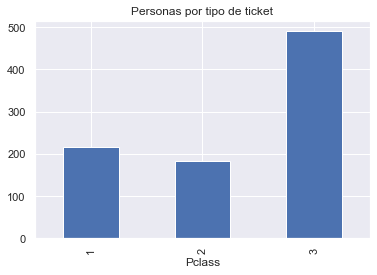

In [323]:
#Vemos la cantidad de personas en la embarcación por clase de ticket

titanic_ticket = titanic.groupby(titanic["Pclass"], axis= 0).count()
titanic_ticket["Survived"].plot(kind = "bar", title= "Personas por tipo de ticket")
titanic_ticket

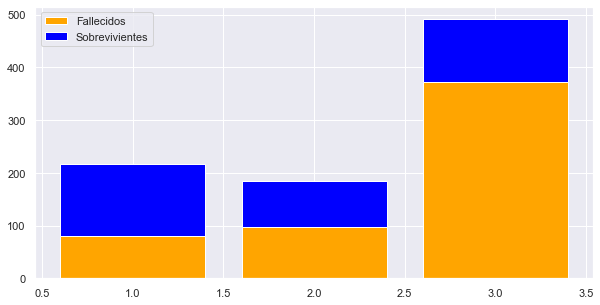

In [324]:
#Graficamos la misma información pero separada entre sobrevivientes y fallecidos durante el accidente del Titanic para cada clase de Ticket.

colores = ["orange", "blue"]
asignar = []

ticket = [1,2,3]
survived = titanic["Survived"].values

t_0 = titanic_0 =titanic[(titanic['Survived']==0)].groupby(titanic["Pclass"]).count()
t0 = t_0["Pclass"]
t_1 = titanic_1 =titanic[(titanic['Survived']==1)].groupby(titanic["Pclass"]).count()
t1 = t_1["Pclass"]


plt.figure(figsize=(10,5))
plt.bar(ticket, t0, color="orange", label = "Fallecidos")
plt.bar(ticket, t1, color = "blue", bottom= t0, label = "Sobrevivientes")
plt.legend()
plt.show()


### Podemos ver que la mayor parte (Mas del 50%) de los los fallecidos son personas de 3ra clase, se posible inferir que esto se debió a que la 3ra las cabinas de tercera clase solían estar en la parte baja de la embarcación.

### Ahora realizaremos un mapa de calor vara ver la correlacion de las variables, para ello primero tokenizaremos la columna sex y Emarked.

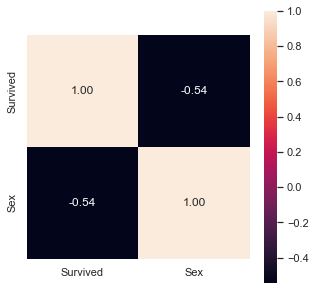

In [423]:
#Primero reemplazaremos los Strings de Sex y Embarked con valores.

# Para ello eliminamos primero las variables texto:
titanic_train = titanic.drop(["PassengerId","Cabin","Name","Ticket","Parch"],axis=1)
titanic_train['Embarked'] = titanic_train['Embarked'].fillna('C')

#Por otra parte, la variable sexo y Embarked las reemplazamos por valores.
# Para ello, creamos una función para que nos agilice la conversión en el set de prueba y entrenamiento.
def tokenizar(x):
    x['Sex'].replace('female', 0,inplace=True)
    x['Sex'].replace('male', 1,inplace=True)
    x['Embarked'].replace('S', 0,inplace=True)
    x['Embarked'].replace('C', 1,inplace=True)
    x['Embarked'].replace('Q', 2,inplace=True)
    x["Age"].fillna("39", inplace = True)
    x.dropna(inplace=True)
tokenizar(titanic_train)

#Ahora realizamos un mapa de calor para mirar la correlacion que existe entre las variables Survived y Sex
correlacion = titanic_train[["Survived", "Sex"]].corr(method = "pearson")
columns = correlacion.nlargest(10,'Survived').index
columns
correlacion_map = np.corrcoef(titanic_train[columns].values.T)

fig, ax = plt.subplots(figsize = (5,5))
sns.set(font_scale=1.0,)
heatmap = sns.heatmap(correlacion_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()


### Vemos que la variable Sex tiene una correlación negativa, pero que quiere decir esto? Si reemplazamos los valores por 0 para mujeres y 1 para hombres?
Para ello veremos la proporcion de mujeres y hombres que sobrevivieron al desastre.

In [427]:
# Lo primero que vemos es la cantidad de mujeres y hombres a bordo del titanic al momento del desastre.
titanic_sex = titanic_train.groupby("Sex").count()
titanic_sex

,Survived,Pclass,Age,SibSp,Fare,Embarked
Sex,,,,,,
0,314,314,314,314,314,314
1,577,577,577,577,577,577


In [459]:
grouptn = titanic_train.groupby(["Sex", "Survived"]).size().reset_index()
grouptn = pd.DataFrame(grouptn)
groutn2 = grouptn.rename({0: "Count"}, axis = 1)
group = groutn2.replace({"Sex" :{0 :"female", 1: "male"}})
group.plot()

,Sex,Survived,Count
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


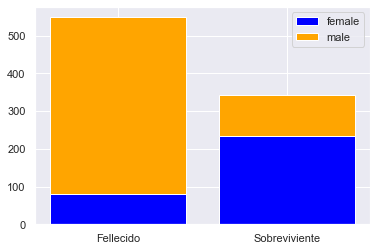

In [470]:
x_fem = group[(group["Sex"] == "female")]["Count"]
x_mal = group[(group["Sex"] == "male")]["Count"]
survive = ["Fellecido", "Sobreviviente"]
plt.bar(survive, x_fem, color = "blue", label ="female")
plt.bar(survive, x_mal, bottom= x_fem,color = "orange", label = "male")
plt.legend()
plt.show()

# Regresion lineal

Ahora manipularemos nuestro dataset y lo adaptaremos para nuestra regresión.

In [289]:
#Verificcamos que todas las columnas tengas datos.
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [290]:
#Formamos los set.add

X = titanic_train.drop("Survived", axis = 1).values
y = titanic_train["Survived"].values

In [291]:
#Normalizamos nuestro dataset
from sklearn.preprocessing import normalize

x_array = np.array(X)
#x_array_norm = normalize(X, norm = "l1") Finalmente dterminé no normalizar dado que bajaba el puntaje F1 del modelo, por lo tanto, el modelo se entrenará con un array de numpy.

In [292]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

log.fit(x_array, y)
prediccion = log.predict(x_array)

In [293]:
Predicciones = pd.DataFrame({'Survived': prediccion})

In [294]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [295]:
#El puntaje de nuestro modelo
print(f"El punta F1 de nuestro modelo es de {f1_score(prediccion, y)}")

El punta F1 de nuestro modelo es de 0.7370030581039756


# Testeo del modelo

Analizamos nuestro modelo con el set de testeo

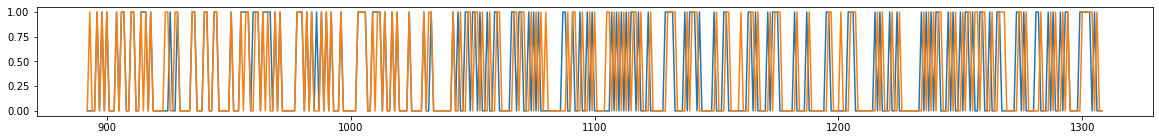

In [296]:
# Cargamos nuestro set de testeo
titanic_test = pd.read_csv("/Users/joseignaciozamora/Desktop/Magister/Analisis de Datos/titanic/test.csv")
titanic_test_dropped = titanic_test.drop(["PassengerId","Cabin","Name","Ticket","Parch"], axis = 1)

# Manipulamos para ingresarlo al modelo
tokenizar(titanic_test_dropped)
X_test = np.array(titanic_test_dropped)
predict_test = log.predict(X_test)

# Agregamos la columna que nos indica si los individuos del testeo sobrevivieron o no
y_test = pd.read_csv("/Users/joseignaciozamora/Desktop/Magister/Analisis de Datos/titanic/gender_submission.csv")
df_test = pd.DataFrame(y_test)
df_test = df_test.iloc[:-1]


pr_test = pd.DataFrame(predict_test)
pr_test.rename(columns = {0: "y_test"})
new_test = pd.concat([df_test, pr_test], axis = 1)
new_test_renamed = new_test.rename(columns = {0: "y_test"})


# Graficamos en una plot lineal
fig, ax = plt.subplots(1,1, figsize = (20,2))

ax.plot(new_test_renamed["PassengerId"], new_test_renamed["y_test"], )
ax.plot(new_test_renamed["PassengerId"], new_test_renamed["Survived"])

In [297]:
# Vemos que el Score no es muy alto para nuestro set de testeo.
f1_score(new_test_renamed["Survived"],new_test_renamed["y_test"])

0.5280528052805281

#### Es posible que la regresión lineal no sea el modelo indicado para este dataset, intentarría con un modelo de clasificación, como un Random Forest o PDA pero por lo general nos sirvió para analizar cosas interesantes como los fallecidos de cada clase de ticket o la proporcion de sobrevivientes por sexo.